# Frequency Conversion-Decoherence

$$
\hat{H}=\hbar\left[g(\hat{a}^\dagger\hat{b}\hat{c}^\dagger+\hat{a}\hat{b}^\dagger\hat{c})+E_a(\hat{a}+\hat{a}^\dagger)+E_b(\hat{b}+\hat{b}^\dagger)\right]
$$
where the decay rate is $\kappa_a,\kappa_b,\kappa_c$

$$
\frac{d\langle A_i\rangle}{dt}=\langle\frac{i}{\hbar}[H,A_i]\rangle+\Sigma_n\langle\frac{\kappa_{n}}{2}[2O_n^{\dagger}A_iO_n- O_n^{\dagger}O_nA_i-A_iO_n^{\dagger}O_n]\rangle
$$

Ignoring the coupling for mode A, we get
$$
\frac{d\langle\hat{a}\rangle}{dt}=-iE_a-\frac{\kappa_a}{2}\langle\hat{a}\rangle
$$

Thus $\langle\hat{a}\rangle=-\frac{2iE_a}{\kappa_a}$

Apply the approximation, we get
$$
\hat{H}_{approx}=\hat{H}=\hbar\left[G^*\hat{b}\hat{c}^\dagger+G\hat{b}^\dagger\hat{c}+E_b(\hat{b}+\hat{b}^\dagger)\right]
$$
where $G=-\frac{2igE_a}{\kappa_a}$

## Initial Environment

In [1]:
#import all the things we need
%matplotlib inline
from qutip import*

from scipy import *

import numpy as np

import matplotlib.pyplot as plt

In [3]:
plt.rcParams.update({'font.size': 12})

In [4]:
#helper function
def BuildOperator_Exact(Ea:float,kappa:float,g:float):
    Na=int(max(math.ceil(10*Ea*Ea/(kappa*kappa))+8*Ea/kappa,16)); Nb=2*max(psi0_l[0],1); Nc=Nb
    psi0=tensor(basis(Na,0),basis(Nb,psi0_l[0]),basis(Nc,psi0_l[1]))
    a=tensor(destroy(Na),qeye(Nb),qeye(Nc))
    b=tensor(qeye(Na),destroy(Nb),qeye(Nc))
    c=tensor(qeye(Na),qeye(Nb),destroy(Nc))
    H=g*(a.dag()*b*c.dag()+a*b.dag()*c)+Ea*(a.dag()+a)
    c_ops=[]
    c_ops.append(np.sqrt(kappa)*a)
    operator={'Hamilton':H,'Collapse':c_ops,'Initial_state':psi0,'track':[b.dag()*b,c.dag()*c,b,c,a.dag()*a,a]}
    return operator

In [5]:
def CalDec1(g,kappa,Ea):
    return g*g/kappa
def CalDec2(g,kappa,Ea):
    return g*g*kappa/(2*(kappa*kappa+64*g*g*Ea*Ea/(kappa*kappa)))
def CalShift(g,kappa,Ea):
    na=4*Ea*Ea/(kappa*kappa)
    omega_r=2*g*Ea/kappa
    return -2*g*g*omega_r/(kappa*kappa+16*g*g*na)

In [6]:
#helper function
def BuildOperator_The(g:float,kappa:float,Ea:float):
    Nb=2*max(psi0_l[0],1); Nc=Nb
    psi0=tensor(basis(Nb,psi0_l[0]),basis(Nc,psi0_l[1]))
    b=tensor(destroy(Nb),qeye(Nc))
    c=tensor(qeye(Nb),destroy(Nc))
    dec1=CalDec1(g,kappa,Ea)
    dec2=CalDec2(g,kappa,Ea)
    R=b.dag()*c
    X=R-R.dag()
    Y=R+R.dag()
    Z=R.dag()*R-R*R.dag()
    H=CalShift(g,kappa,Ea)*1j*X
    #H=tensor(qeye(Nb),qeye(Nc))
    c_ops=[]
    c_ops.append(np.sqrt(dec1)*X)
    c_ops.append(np.sqrt(dec2)*Y)
    c_ops.append(np.sqrt(dec2)*Z)
    operator={'Hamilton':H,'Collapse':c_ops,'Initial_state':psi0,'track':[b.dag()*b,c.dag()*c,b*c.dag(),b.dag()*c]}
    return operator

In [7]:
def TheNb(g:float,kappa:float,Ea:float,t):
    omega=2*g*Ea/kappa-CalShift(g,kappa,Ea)
    omega=2*omega
    gamma=2*(CalDec1(g,kappa,Ea)+CalDec2(g,kappa,Ea))
    return 0.5*(1+np.exp(-gamma*t)*(np.cos(omega*t)))

## Complete Model and Analysis

### Standard Parameters

In [8]:
Ea=20
kappa_a=20
g=0.5

In [11]:
cor1="#37C2B8" 
cor2="#BE5841"
cor3='hotpink'

In [12]:
cor=[cor1,cor3,cor2]

### Various g

In [13]:
g_span=np.asarray(np.linspace(0.1,1,20))

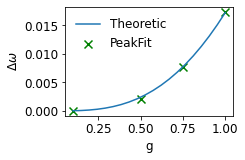

In [14]:
fig, axes = plt.subplots(1,1,figsize=(3,2))

axes.plot(g_span,-2*CalShift(g_span,kappa_a,Ea),linestyle='-',label="Theoretic")
axes.scatter(0.1,2.784364713181997e-06,c='green',s=64,marker = 'x',label="PeakFit")
axes.scatter(0.5, 0.0021095779197031206,c='green',s=64,marker = 'x')
axes.scatter(0.75,0.007784859741663208,c='green',s=64,marker = 'x')
axes.scatter(1.00,0.017349093953278327,c='green',s=64,marker = 'x')

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel('g')
axes.set_ylabel(r'$\Delta\omega$')

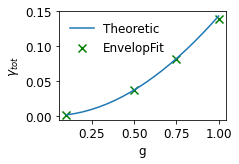

In [15]:
fig, axes = plt.subplots(1,1,figsize=(3,2))


axes.plot(g_span,2*(CalDec1(g_span,kappa_a,Ea)+CalDec2(g_span,kappa_a,Ea)),linestyle='-',label="Theoretic")
axes.scatter(0.1,0.001492552,c='green',s=64,marker = 'x',label="EnvelopFit")
axes.scatter(0.5, 0.03677313,c='green',s=64,marker = 'x')
axes.scatter(0.75,0.08084109,c='green',s=64,marker = 'x')
axes.scatter(1.00,0.13921284,c='green',s=64,marker = 'x')

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel('g')
axes.set_ylabel(r'$\gamma_{tot}$')

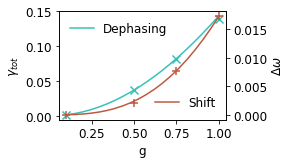

In [16]:
fig, ax1 = plt.subplots(figsize=(3,2))
plt.tick_params(axis='both')
plot1 = ax1.plot(g_span,2*(CalDec1(g_span,kappa_a,Ea)+CalDec2(g_span,kappa_a,Ea)),color=cor1,linestyle='-',label="Dephasing")
ax1.scatter(0.1,0.001492552,c=cor1,s=64,marker = 'x')
ax1.scatter(0.5, 0.03677313,c=cor1,s=64,marker = 'x')
ax1.scatter(0.75,0.08084109,c=cor1,s=64,marker = 'x')
ax1.scatter(1.00,0.13921284,c=cor1,s=64,marker = 'x')
ax1.set_ylabel(r'$\gamma_{tot}$') 
ax2 = ax1.twinx()
plot2 = ax2.plot(g_span,-2*CalShift(g_span,kappa_a,Ea),linestyle='-',color=cor2,label="Shift")
ax2.scatter(0.1,2.784364713181997e-06,c=cor2,s=64,marker = '+')
ax2.scatter(0.5, 0.0021095779197031206,c=cor2,s=64,marker = '+')
ax2.scatter(0.75,0.007784859741663208,c=cor2,s=64,marker = '+')
ax2.scatter(1.00,0.017349093953278327,c=cor2,s=64,marker = '+')
ax2.set_ylabel(r'$\Delta\omega$')              
ax1.set_xlabel('g')            
ax1.legend(loc=0,ncol=1,frameon=False)  
ax2.legend(loc=4,ncol=1,frameon=False) 

### Various E

In [17]:
Ea_span=np.asarray(np.linspace(10,40,20))

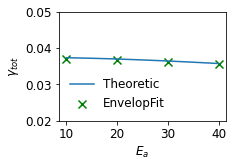

In [18]:
fig, axes = plt.subplots(1,1,figsize=(3,2))
axes.set_ylim(0.02,0.05)
axes.plot(Ea_span,2*(CalDec1(g,kappa_a,Ea_span)+CalDec2(g,kappa_a,Ea_span)),linestyle='-',label="Theoretic")
axes.scatter(10,0.03713746,c='green',s=64,marker = 'x',label="EnvelopFit")
axes.scatter(20,0.03677313,c='green',s=64,marker = 'x')
axes.scatter(30,0.03624364,c='green',s=64,marker = 'x')
axes.scatter(40,0.03557345,c='green',s=64,marker = 'x')

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel(r'$E_a$')
axes.set_ylabel(r'$\gamma_{tot}$')

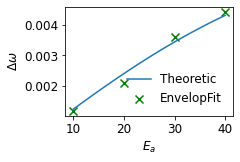

In [19]:
fig, axes = plt.subplots(1,1,figsize=(3,2))
axes.plot(Ea_span,-2*CalShift(g,kappa_a,Ea_span),linestyle='-',label="Theoretic")
axes.scatter(10,0.0011912635875321875,c='green',s=64,marker = 'x',label="EnvelopFit")
axes.scatter(20,0.0021095779197031206,c='green',s=64,marker = 'x')
axes.scatter(30,0.003595392950293874,c='green',s=64,marker = 'x')
axes.scatter(40,0.004422702849105065,c='green',s=64,marker = 'x')

axes.legend(loc=0,ncol=1,frameon=False)

axes.set_xlabel(r'$E_a$')
axes.set_ylabel(r'$\Delta\omega$')

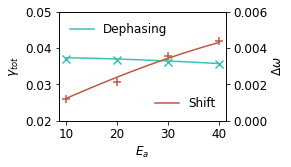

In [20]:
fig, ax1 = plt.subplots(figsize=(3,2))
plt.tick_params(axis='both')
ax1.set_ylim(0.02,0.05)
plot1 = ax1.plot(Ea_span,2*(CalDec1(g,kappa_a,Ea_span)+CalDec2(g,kappa_a,Ea_span)),color=cor1,linestyle='-',label="Dephasing")
ax1.scatter(10,0.03713746,c=cor1,s=64,marker = 'x')
ax1.scatter(20,0.03677313,c=cor1,s=64,marker = 'x')
ax1.scatter(30,0.03624364,c=cor1,s=64,marker = 'x')
ax1.scatter(40,0.03557345,c=cor1,s=64,marker = 'x')
ax1.set_ylabel(r'$\gamma_{tot}$') 
ax2 = ax1.twinx()
ax2.set_ylim(0,0.006)
plot2 = ax2.plot(Ea_span,-2*CalShift(g,kappa_a,Ea_span),linestyle='-',color=cor2,label="Shift")
ax2.scatter(10,0.0011912635875321875,c=cor2,s=64,marker = '+')
ax2.scatter(20,0.0021095779197031206,c=cor2,s=64,marker = '+')
ax2.scatter(30,0.003595392950293874,c=cor2,s=64,marker = '+')
ax2.scatter(40,0.004422702849105065,c=cor2,s=64,marker = '+')
ax2.set_ylabel(r'$\Delta\omega$')              
ax1.set_xlabel(r'$E_a$')            
ax1.legend(loc=2,ncol=1,frameon=False)  
ax2.legend(loc=4,ncol=1,frameon=False) 

### Various $g$ fix $\kappa$ and $\omega_r$

In [21]:
psi0_l=[1,0]
Ea=[40,20,10]
kappa_a=20
g=[0.25,0.5,1]
tlist=np.linspace(0,10,500)
output=[]
output_env=[]

In [22]:
for j in range(0,np.size(g)):
    op=BuildOperator_Exact(Ea[j],kappa_a,g[j])
    op_env=BuildOperator_The(g[j],kappa_a,Ea[j])
    output.append(mesolve(op['Hamilton'],op['Initial_state'],tlist,op['Collapse'],op['track']))
    output_env.append(mesolve(op_env['Hamilton'],op_env['Initial_state'],tlist,op_env['Collapse'],op_env['track']))

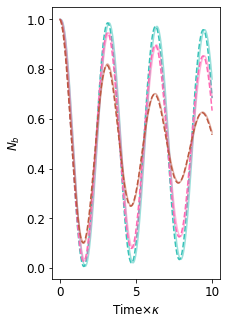

In [35]:
fig, axes = plt.subplots(1,1,figsize=(3,5))

for j in range(0,np.size(Ea)):
    omega_r=2*g[j]*Ea[j]/kappa_a
    axes.plot(tlist, output[j].expect[0],color=cor[j],label=r'$g=$'+str(g[j]),alpha=0.5)
    axes.plot(tlist,TheNb(g[j],kappa_a,Ea[j],tlist),color=cor[j],linestyle='--')

axes.set_xlabel('Time'+r'$\times\kappa$')
axes.set_ylabel(r'$N_b$')